In [21]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

# Pikseller

In [22]:
img = cv2.imread('Data/klon.jpg')

dimension = img.shape
print("Fotoğreafın boyutu ve kanal sayısı: ", dimension)

color = img[120,100]
print("BGR: ", color)

blue = img[120, 100, 0]
print("blue: ", blue)

green = img[120, 100, 1]
print("green: ", green)

red = img[120, 100, 2]
print("red: ", red)

img[120, 100, 0] = 250

blue1 = img.item(150,200,0)
print("blue 1: ", blue1)
img.itemset((150,200,0), 150)
print("new blue 1: ", img[150,200,0])


cv2.imshow('Klon asker', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


Fotoğreafın boyutu ve kanal sayısı:  (426, 640, 3)
BGR:  [121 119 125]
blue:  121
green:  119
red:  125
blue 1:  158
new blue 1:  150


# Region of Interest (ROI)

In [23]:
img = cv2.imread('Data/klon.jpg')

roi = img[30:190, 200:380]

cv2.imshow('Klon asker', img)
cv2.imshow('Roi', roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Resimleri Toplama İşlemi

In [24]:
circle = np.zeros((512,512,3), dtype= np.uint8) + 255
circle = cv2.circle(circle, (256,256), 60, (255,0,0), -1)

rectangle = np.zeros((512,512,3), dtype= np.uint8) + 255
rectangle = cv2.rectangle(rectangle, (150,150), (350,350), (0,0,255), -1)

add = cv2.add(rectangle,circle)

cv2.imshow('circle', circle)
cv2.imshow('rectangle', rectangle)
cv2.imshow('add', add)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Ağırlıklı Toplama

In [25]:
circle = np.zeros((512,512,3), dtype= np.uint8) + 255
circle = cv2.circle(circle, (256,256), 60, (255,0,0), -1)

rectangle = np.zeros((512,512,3), dtype= np.uint8) + 255
rectangle = cv2.rectangle(rectangle, (150,150), (350,350), (0,0,255), -1)

dst = cv2.addWeighted(circle, 0.7, rectangle, 0.3, 0) # circle resminin oranı 0.7 , recrangle resminin oranı 0.3 dür ve bu oranlara göre toplam işlemi gerçekleşir

cv2.imshow('circle', circle)
cv2.imshow('rectangle', rectangle)
cv2.imshow('Agirlikli Toplam', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Renk Uzayı

In [26]:
img = cv2.imread('Data/klon.jpg')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.imshow('Klon BGR', img)
cv2.imshow('Klon RGB', img_rgb)
cv2.imshow('Klon HSV', img_hsv)
cv2.imshow('Klon GRAY', img_gray)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Renk Uzayı Video

In [27]:
cap = cv2.VideoCapture('Data/ornek_video.mp4')

while True:
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    cv2.imshow('Video', frame)
    if ret == 0:
        break
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows


<function destroyAllWindows>

# Renklerin HSV Kodlarını Bulma

In [28]:
cap = cv2.VideoCapture(0)

def nothing(x):
    pass

cv2.namedWindow('Trackbar')
cv2.resizeWindow('Trackbar', 500, 500)

cv2.createTrackbar('Lower - H', 'Trackbar', 0, 180, nothing)
cv2.createTrackbar('Lower - S', 'Trackbar', 0, 255, nothing)
cv2.createTrackbar('Lower - V', 'Trackbar', 0, 255, nothing)

cv2.createTrackbar('Upper - H', 'Trackbar', 0, 180, nothing)
cv2.createTrackbar('Upper - S', 'Trackbar', 0, 255, nothing)
cv2.createTrackbar('Upper - V', 'Trackbar', 0, 255, nothing)

cv2.setTrackbarPos('Upper - H', 'Trackbar', 180)
cv2.setTrackbarPos('Upper - S', 'Trackbar', 255)
cv2.setTrackbarPos('Upper - V', 'Trackbar', 255)

while True:
    ret, frame = cap.read()
    if not ret:
        print("Frame okunamıyor")
        break
    
    frame = cv2.flip(frame, 1)
    
    frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_h = cv2.getTrackbarPos('Lower - H', 'Trackbar')
    lower_s = cv2.getTrackbarPos('Lower - S', 'Trackbar')
    lower_v = cv2.getTrackbarPos('Lower - V', 'Trackbar') 
    
    upper_h = cv2.getTrackbarPos('Upper - H', 'Trackbar')
    upper_s = cv2.getTrackbarPos('Upper - S', 'Trackbar')
    upper_v = cv2.getTrackbarPos('Upper - V', 'Trackbar')
    
    lower_color = np.array([lower_h, lower_s, lower_v])
    upper_color = np.array([upper_h, upper_s, upper_v])
    
    mask = cv2.inRange(frame_hsv, lower_color, upper_color)
    
    cv2.imshow('Original', frame)
    cv2.imshow('Mask', mask)
    
    if cv2.waitKey(20) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Smoothing Images

In [29]:
img_filter = cv2.imread('Data/filter.png')
img_filter = cv2.resize(img_filter,(300,300))

img_median = cv2.imread('Data/median.png')
img_median = cv2.resize(img_median,(300,300))

img_bilateral = cv2.imread('Data/bilateral.png')
img_bilateral = cv2.resize(img_bilateral,(300,300))

blur = cv2.blur(img_filter, (5,5))
blur_g = cv2.GaussianBlur(img_filter, (5,5), cv2.BORDER_DEFAULT)
blur_m = cv2.medianBlur(img_median, 9) # Tek sayılar verilebilinir
blur_b = cv2.bilateralFilter(img_bilateral, 9, 9.75, 9.75)

cv2.imshow('orginal blur', img_filter)
cv2.imshow('blur gaussian', blur_g)
cv2.imshow('blur ', blur)

cv2.imshow('orginal median', img_median)
cv2.imshow('blur median', blur_m)

cv2.imshow('orginal bilateral', img_bilateral)
cv2.imshow('blur bilateral', blur_b)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Bitwise

In [30]:
img1 = cv2.imread('Data/bitwise_1.png')
img2 = cv2.imread('Data/bitwise_2.png')

bit_and = cv2.bitwise_and(img2,img1)
bit_or = cv2.bitwise_or(img2,img1)
bit_xor = cv2.bitwise_xor(img2,img1)
bit_not1 = cv2.bitwise_not(img1)
bit_not2 = cv2.bitwise_not(img2)

cv2.imshow("img1",img1)
cv2.imshow("img2",img2)
cv2.imshow("bit_not 1",bit_not1)
cv2.imshow("bit_not 2",bit_not2)
cv2.imshow("bit_xor",bit_xor)
cv2.imshow("bit_or",bit_or)
cv2.imshow("bit_and",bit_and)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Resim Dönüşüm Dizeyi

In [31]:
img = cv2.imread('Data/klon.jpg',0)
row,col = img.shape

M= np.float32([[1,0,5],[0,1,100]]) # Resmi y ekseninden 100 piksel ve x ekseninden 5 piksel kaydırmak için

dst = cv2.warpAffine(img,M,(row,col))

cv2.imshow("dst",dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Resim Döndürme

In [32]:
img = cv2.imread('Data/klon.jpg',0)
row,col = img.shape

M90= cv2.getRotationMatrix2D((col/2,row/2),90,1) #90 derece
M180= cv2.getRotationMatrix2D((col/2,row/2),180,1) #180 derece

dst = cv2.warpAffine(img,M90,(col,row))
dst1 = cv2.warpAffine(img,M180,(col,row))

cv2.imshow("dst",dst)
cv2.imshow("dst1",dst1)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Thresholding

In [33]:
# Thresholding de resim gray scale olmalıdır
img = cv2.imread('Data/klon.jpg',0) # gray scale

ret,th1 = cv2.threshold(img,80,150,cv2.THRESH_BINARY) #1. YÖNTEM 
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,21,2) #2. YÖNTEM 
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,21,2) #3. YÖNTEM 


cv2.imshow("img-th1",th1)
cv2.imshow("img-th2",th2)
cv2.imshow("img-th3",th3)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Morfolojik İşlemler

In [34]:
img = cv2.imread('Data/klon.jpg',0)

kernel = np.ones((5,5),np.uint8)

erosion = cv2.erode(img,kernel,iterations = 1)
dilation = cv2.dilate(img,kernel,iterations = 1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

cv2.imshow('erosion', erosion)
cv2.imshow('dilation', dilation)
cv2.imshow('opening', opening)
cv2.imshow('closing', closing)
cv2.imshow('gradient', gradient)
cv2.imshow('tophat', tophat)
cv2.imshow('blackhat', blackhat)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Histogram

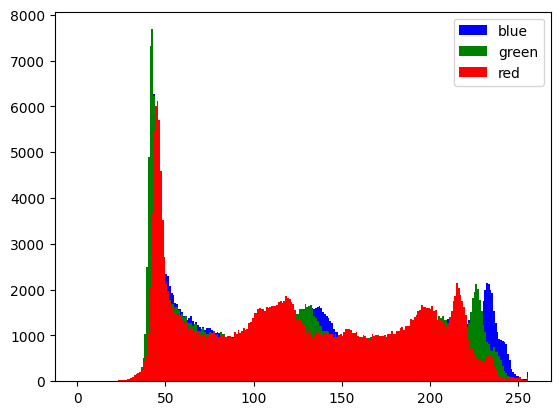

In [35]:
img = cv2.imread('Data/klon.jpg')
b, g, r = cv2.split(img)
cv2.imshow("img", img)

plt.hist(b.ravel(), 256, [0, 256], color='blue')
plt.hist(g.ravel(), 256, [0, 256], color='green')
plt.hist(r.ravel(), 256, [0, 256], color='red')

plt.legend(['blue', 'green', 'red'])

plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

# Görüntüdeki Köşeleri Saptama (Shi - Tomasi Corner Detection Method)

In [36]:
img = cv2.imread('Data/contour.png')
img1 = cv2.imread('Data/text.png')

gray = np.float32(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))
gray1 = np.float32(cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY))


corners = np.intp(cv2.goodFeaturesToTrack(gray,50,0.01,10))
corners1 = np.intp(cv2.goodFeaturesToTrack(gray1,50,0.01,10))

for corner in corners:
    x,y = corner.ravel()
    cv2.circle(img,(x,y),3,(0,0,255),-1)

for corner in corners1:
    x,y = corner.ravel()
    cv2.circle(img1,(x,y),3,(0,0,255),-1)

cv2.imshow("corner",img)
cv2.imshow("corner1",img1)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Görüntüdeki Kenarları Saptama (Canny Edge Detection)

In [37]:
cap = cv2.VideoCapture(0)

while 1:
    ret,frame = cap.read()
    frame = cv2.flip(frame,1)

    edges = cv2.Canny(frame,80,120)

    cv2.imshow("Frame",frame)
    cv2.imshow("Edges",edges)

    if cv2.waitKey(5) & 0xFF==ord('q'):
        break

cap.release()
cv2.destroyAllWindows()